## Database connection example in Python 
### Dataset details - Youtube channel
#### Rank(String) : denotes the Socialblade rankings of the YouTube channel
#### Grade(String) : denotes the grade of the YouTube channel as conferred by Socialblade
#### Channel name(String) : The name of the YouTube channel.
#### Video Uploads(String) : Total number of videos uploaded by the YouTube channel
#### Subscribers(String) : Total number of subscribers of the YouTube channel.
#### Video views(Integer) : Total number of views of all the video content by the YouTube channel

In [1]:
# Importing required libraries
import pymongo 
import pprint #Library to print data in pretty format
import re
from pymongo import MongoClient

In [2]:
# Connect to local Mongo DB Database 
client = MongoClient('localhost', 27017)

# Reading database named "Youtube"
db = client['Youtube']
collection = db['channels']
doc_iterator = collection.find()
collection.count_documents({})

5000

In [3]:
# Print data in pretty format
for doc in collection.find().limit(1):
    pprint.pprint (doc)

{'_id': ObjectId('5c6871ce03f61b3182d6d47c'),
 'channel_name': 'Zee TV',
 'currdate': '02/17/2019',
 'grade': 'A++',
 'rank': '1st',
 'subscribers': 18752951,
 'video_uploads': 82757,
 'video_views': 20869786591}


In [4]:
# Sample query of the assignment
pipe = [
    {"$group": {"_id":"$grade","totalchannels": {"$sum": 1 }}},
    {"$sort": {"totalchannels": -1}},
    {"$limit":2}
]

cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 'B+', 'totalchannels': 2956}
{'_id': 'A-', 'totalchannels': 1024}


## Using Pandas for working with MongoDB

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

youtubepd = db['channels']
df = json_normalize(list(youtubepd.find()))
df.head(5)
df.shape

(5000, 8)

In [6]:
df.head(5)

,_id,channel_name,currdate,grade,rank,subscribers,video_uploads,video_views
0,5c6871ce03f61b3182d6d47c,Zee TV,02/17/2019,A++,1st,18752951,82757,20869786591
1,5c6871ce03f61b3182d6d47d,T-Series,02/17/2019,A++,2nd,61196302,12661,47548839843
2,5c6871ce03f61b3182d6d47e,Cocomelon - Nursery Rhymes,02/17/2019,A++,3rd,19238251,373,9793305082
3,5c6871ce03f61b3182d6d47f,SET India,02/17/2019,A++,4th,31180559,27323,22675948293
4,5c6871ce03f61b3182d6d480,WWE,02/17/2019,A++,5th,32852346,36756,26273668433


In [7]:
#Check if there are any null columns present
df.columns[df.isnull().any()].tolist()

[]

In [8]:
#Print datatypes of all the columns
df.dtypes

_id              object
channel_name     object
currdate         object
grade            object
rank             object
subscribers      object
video_uploads    object
video_views       int64
dtype: object

In [9]:
#Grouping by grade

df_mod = pd.DataFrame(df.groupby(['grade'])['channel_name'].count()).reset_index()
df_mod.head(10)

,grade,channel_name
0,,6
1,A,963
2,A+,41
3,A++,10
4,A-,1024
5,B+,2956


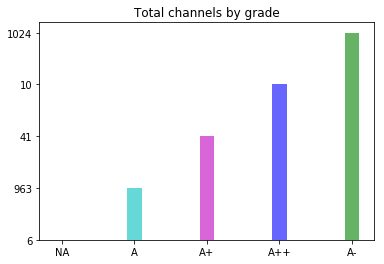

In [10]:
# Define common variables
n = 5
emotions = 'NA', 'A', 'A+', 'A++', 'A-'
channels = '6','963','41','10','1024'
colors = {'b', 'g', 'r', 'c', 'm'} # color palette
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode all slice4
index = np.arange(n)
bar_width = 0.2
opacity = 0.6

# Define subplots and populate pie charts
f, ax1 = plt.subplots(1, 1)

ax1.bar(index, channels, bar_width, tick_label=emotions, color=colors, alpha=opacity)
ax1.set_title('Total channels by grade')
plt.show()